In [ ]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc

if platform.system() =='Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [ ]:
data_draw_korea = pd.read_csv('data_draw_korea.csv', index_col=0, encoding='UTF-8')
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [ ]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

gamma = 0.75

# blockedMap = data_draw_korea #지도에 쓸 데이터값
# targetData = '인구수' #지도상에 표현하고싶은 값

blockedMap = obesity #지도에 쓸 데이터값
targetData = 'obesity_1' #지도상에 표현하고싶은 값

whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])
#최대값과, 

datalabel = targetData

vmin = min(blockedMap[targetData])
vmax = max(blockedMap[targetData])

mapdata = blockedMap.pivot(index='y', columns='x', values=targetData) #x와 y 좌표를 통해 표현
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

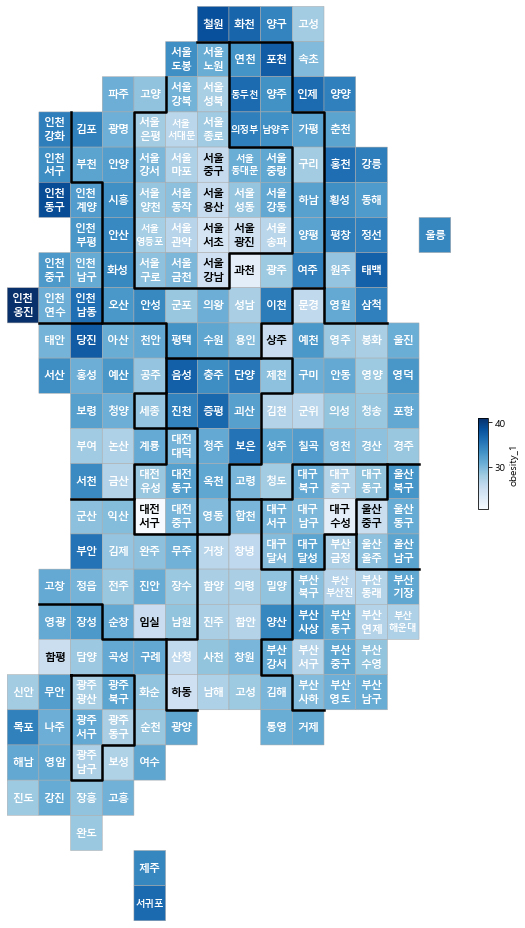

In [ ]:
cmapname = 'Blues' #'Reds'

plt.figure(figsize=(8, 13))
plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

# 지역 이름 표시
for idx, row in blockedMap.iterrows():
    annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
    if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
        dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
        if len(row['행정구역']) <= 2:
            dispname += row['행정구역'][-1]
    else:
        dispname = row['행정구역'][:-1]

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', color=annocolor,
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=2.5) # lw : 경계선의 두께

plt.gca().invert_yaxis()
plt.axis('off')
    
cb = plt.colorbar(shrink=.1, aspect=10)
cb.set_label(datalabel)

plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv('data_draw_korea.csv', index_col=0, encoding='UTF-8')

In [ ]:
df 

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...
224,127462,제천,8,10,882.47,충청북도,제천시
225,34480,증평,6,11,81.84,충청북도,증평군
226,62809,진천,5,11,406.08,충청북도,진천군
227,790216,청주,6,12,932.51,충청북도,청주시


In [ ]:
x = '경기도 남양주시' # 남양주
y = '서울특별시 중구' # 서울중구
z = '세종시' #세종

def region_map_name(x): #지도만들기에 알맞게 이름을 바꿔주는 함수
    sp = x.split(' ')
    
    if '고성' in x:
        if sp[0] == '강원도':
            return '고성(강원)'
        else:
            return '고성(경남)'
    if '미추홀' in x:
        return '인천남구'
    
    #Case 1: 00도 00시 or 00도 00 or 00 00시 or 00 00 ex) 경기도 남양주시 -> 남양주, 경기도 남양주 -> 남양주
    if sp[0] == '경기도':
        sp = sp[1][:-1]
        
    elif sp[0] == '강원도':
        sp = sp[1][:-1]
        
    elif sp[0] == '경상남도':
        sp = sp[1][:-1] 
        
    elif sp[0] == '경상북도':
        sp = sp[1][:-1]
        
    elif sp[0] == '충청남도':
        sp = sp[1][:-1]
        
    elif sp[0] == '충청북도':
        sp = sp[1][:-1]
                
    elif sp[0] == '전라남도':
        sp = sp[1][:-1]
                
    elif sp[0] == '전라북도':
        sp = sp[1][:-1]
                
    elif sp[0] == '제주특별자치도':
        sp = sp[1][:-1]
    
    #Case 2: ㅇㅇ시 ㅇㅇ구 ex) 서울시 강동구 -> 서울강동
    elif sp[0] == '인천광역시':
        if len(x.split(' ')[1]) == 2:
            sp = sp[0][:2]+sp[1]
        else:
            sp = sp[0][:2]+sp[1][:-1]
    
    elif sp[0] == '광주광역시':
        if len(x.split(' ')[1]) == 2:
            sp = sp[0][:2]+sp[1]
        else:
            sp = sp[0][:2]+sp[1][:-1]
    
    elif sp[0] == '대구광역시':
        if len(x.split(' ')[1]) == 2:
            sp = sp[0][:2]+sp[1]
        else:
            sp = sp[0][:2]+sp[1][:-1]
        
    elif sp[0] == '대전광역시':
        if len(x.split(' ')[1]) == 2:
            sp = sp[0][:2]+sp[1]
        else:
            sp = sp[0][:2]+sp[1][:-1]
        
    elif sp[0] == '부산광역시':
        if len(x.split(' ')[1]) == 2:
            sp = sp[0][:2]+sp[1]
        else:
            sp = sp[0][:2]+sp[1][:-1]
        
    elif sp[0] == '서울특별시':
        if len(x.split(' ')[1]) == 2:
            sp = sp[0][:2]+sp[1]
        else:
            sp = sp[0][:2]+sp[1][:-1]
        
    elif sp[0] == '울산광역시':
        if len(x.split(' ')[1]) == 2:
            sp = sp[0][:2]+sp[1]
        else:
            sp = sp[0][:2]+sp[1][:-1]
    
    #Case 3: ㅇㅇ시 만 있는 경우 ex) 세종시 -> 세종
    elif sp[0] == '세종특별자치시':
        sp = '세종'
    
    else:
        return x
    return sp

In [ ]:
def stat_preprocess(file_nm): #통계데이터를 가져와서 지도에 쓸수있도록 사이즈를 맞추는 함수
    file = pd.read_csv(file_nm, encoding='cp949')
    file['addr'] = file['addr'].apply(region_map_name)
    file['addr'] = file['addr'].drop_duplicates()
    return file.dropna()

In [ ]:
obesity = pd.read_csv('비만율.csv', encoding='cp949')
obesity = stat_preprocess('비만율.csv')

In [ ]:
obesity

,addr,obesity_1,obesity_2
0,서울강남,24.8,26.3
1,서울강동,31.3,32.0
2,서울강북,30.3,31.2
3,서울강서,29.9,31.2
4,서울관악,26.6,25.5
...,...,...,...
259,함안,26.8,28.1
260,함양,27.4,30.3
261,합천,30.0,33.9
262,서귀포,36.5,36.7


In [ ]:
def match_region(stat_pd): #각 위치끼리 동일한것을 찾아서 불러온 통계파일에 값을 집어넣음
    stat_pd['x'] = [df[df['shortName'] == x]['x'].values[0] for x in stat_pd['addr']]
    stat_pd['y'] = [df[df['shortName'] == y]['y'].values[0] for y in stat_pd['addr']]
    stat_pd['광역시도'] = [df[df['shortName'] == g]['광역시도'].values[0] for g in stat_pd['addr']]
    stat_pd['행정구역'] = [df[df['shortName'] == h]['행정구역'].values[0] for h in stat_pd['addr']]

In [ ]:
match_region(obesity)

In [ ]:
obesity

,addr,obesity_1,obesity_2,x,y,광역시도,행정구역
0,서울강남,24.8,26.3,6,7,서울특별시,강남구
1,서울강동,31.3,32.0,8,5,서울특별시,강동구
2,서울강북,30.3,31.2,5,2,서울특별시,강북구
3,서울강서,29.9,31.2,4,4,서울특별시,강서구
4,서울관악,26.6,25.5,5,6,서울특별시,관악구
...,...,...,...,...,...,...,...
259,함안,26.8,28.1,7,17,경상남도,함안군
260,함양,27.4,30.3,6,16,경상남도,함양군
261,합천,30.0,33.9,7,14,경상남도,합천군
262,서귀포,36.5,36.7,4,25,제주특별자치도,서귀포시


In [ ]:
region_map_name('경기도 부천')

'부'

In [ ]:
def delete_do(x):
    sp = x.split(' ')
    
    if len(sp) > 1:
        if sp[0][-1] == '도':
            return sp[1]
        else:
            return x
    else:
        return x

In [ ]:
delete_do('남양주')

In [ ]:
def delete_sigun(x):
    if x[-1] == '시' or x[-1] == '군':
        return x[:-1]
    else:
        return x

In [ ]:
delete_sigun('강화군')

'강화'

In [ ]:
def merge_sigu(x):
    sp = x.split(' ')
    if sp[0][-1] == '시':
        if len(x.split(' ')[1]) == 2:
            return sp[0][:2]+sp[1]
        else:
            return sp[0][:2]+sp[1][:-1]
    else:
        return x

In [ ]:
def del_gangwon(x):
    if '강원' in x:
        return x.replace('강원','').replace(' ','')
    else:
        return x

In [ ]:
def sejong(x):
    if '세종' in x:
        return '세종'
    else:
        return x

In [ ]:
def smallsigu(a):
    if '시' in a:
        if a.index('시') == 2:
            return a[:a.index('시')]
        else:
            return a
    elif '원' in a:
        if a.index('원') == 2:
            return a[:a.index('원')]
        else:
            return a
    else:
        return a

In [ ]:
merge_sigu('서울특별시 광진구')

'서울광진'

In [ ]:
total = pd.read_csv('total.csv')

In [ ]:
ttl = total.copy()
len(ttl['addr'].unique())

453

In [ ]:
ttl['addr'] = ttl['addr'].apply(delete_do)

In [ ]:
ttl

,addr,category,brand
0,의정부시,피자,59쌀피자
1,대전광역시 동구,피자,59쌀피자
2,창원시,피자,59쌀피자
3,인천광역시 서구,피자,59쌀피자
4,인천광역시 서구,피자,59쌀피자
...,...,...,...
15931,대구광역시 수성구,치킨,호식이두마리치킨
15932,대구광역시 달서구,치킨,호식이두마리치킨
15933,칠곡군,치킨,호식이두마리치킨
15934,구미시,치킨,호식이두마리치킨


In [ ]:
ttl['addr'] = ttl['addr'].apply(delete_sigun)

In [ ]:
ttl

,addr,category,brand
0,의정부,피자,59쌀피자
1,대전광역시 동구,피자,59쌀피자
2,창원,피자,59쌀피자
3,인천광역시 서구,피자,59쌀피자
4,인천광역시 서구,피자,59쌀피자
...,...,...,...
15931,대구광역시 수성구,치킨,호식이두마리치킨
15932,대구광역시 달서구,치킨,호식이두마리치킨
15933,칠곡,치킨,호식이두마리치킨
15934,구미,치킨,호식이두마리치킨


In [ ]:
len(ttl['addr'].unique())

441

In [ ]:
ttl['addr'] = ttl['addr'].apply(merge_sigu)

In [ ]:
ttl['addr'].unique()

array(['의정부', '대전동구', '창원', '인천서구', '성남', '양산', '인천남동', '강원 강릉', '서울양천',
       '강원 영월', '인천강화', '강원 춘천', '시흥', '거제', '거창', '김포', '수원', '인천계양',
       '부천', '서울동대문', '고양', '안산', '서울구로', '안성', '인천중구', '인천남구', '진천',
       '구미', '서울광진', '대구달성', '군산', '군포', '서울강동', '남양주', '서울성동', '익산',
       '음성', '부산기장', '김제', '김해', '서울관악', '남원', '홍성', '논산', '울산북구', '단양',
       '부산부산진', '당진', '강원 평창', '서울동작', '오산', '대전서구', '대전중구', '대전대덕', '포천',
       '양주', '서울도봉', '서울성북', '서울종로', '보령', '동두천', '인천부평', '아산', '인천연수',
       '서울강서', '서울송파', '서울용산', '서울중랑', '충주', '무주', '파주', '강원 원주', '대전유성',
       '서울강북', '천안', '울산중구', '화성', '광주남구', '부안', '강원 동해', '서울은평', '전주',
       '서울노원', '장성', '서울마포', '상주', '대구북구', '서산', '인천동구', '순천', '안동', '안양',
       '양평', '포항', '영동', '서울영등포', '창녕', '영천', '예산', '청주', '광주', '여주',
       '옥천', '평택', '용인', '의령', '의성', '의왕', '이천', '구리', '서천', '부산해운대',
       '연천', '세종전의', '청양', '강원 정선', '정읍', '제천', '인천미추홀', '증평', '경산', '진주',
       '광명', '가평', '함안', '부산남구', '하남', '문경', '예천', '영주', '김천

In [ ]:
ttl['addr'] = ttl['addr'].apply(del_gangwon)
ttl['addr'].unique()

array(['의정부', '대전동구', '창원', '인천서구', '성남', '양산', '인천남동', '강릉', '서울양천',
       '영월', '인천강화', '춘천', '시흥', '거제', '거창', '김포', '수원', '인천계양', '부천',
       '서울동대문', '고양', '안산', '서울구로', '안성', '인천중구', '인천남구', '진천', '구미',
       '서울광진', '대구달성', '군산', '군포', '서울강동', '남양주', '서울성동', '익산', '음성',
       '부산기장', '김제', '김해', '서울관악', '남원', '홍성', '논산', '울산북구', '단양',
       '부산부산진', '당진', '평창', '서울동작', '오산', '대전서구', '대전중구', '대전대덕', '포천',
       '양주', '서울도봉', '서울성북', '서울종로', '보령', '동두천', '인천부평', '아산', '인천연수',
       '서울강서', '서울송파', '서울용산', '서울중랑', '충주', '무주', '파주', '원주', '대전유성',
       '서울강북', '천안', '울산중구', '화성', '광주남구', '부안', '동해', '서울은평', '전주',
       '서울노원', '장성', '서울마포', '상주', '대구북구', '서산', '인천동구', '순천', '안동', '안양',
       '양평', '포항', '영동', '서울영등포', '창녕', '영천', '예산', '청주', '광주', '여주',
       '옥천', '평택', '용인', '의령', '의성', '의왕', '이천', '구리', '서천', '부산해운대',
       '연천', '세종전의', '청양', '정선', '정읍', '제천', '인천미추홀', '증평', '경산', '진주',
       '광명', '가평', '함안', '부산남구', '하남', '문경', '예천', '영주', '김천', '군위', '칠곡',
      

In [ ]:
ttl['addr'] = ttl['addr'].apply(sejong)
ttl['addr'].unique()

array(['의정부', '대전동구', '창원', '인천서구', '성남', '양산', '인천남동', '강릉', '서울양천',
       '영월', '인천강화', '춘천', '시흥', '거제', '거창', '김포', '수원', '인천계양', '부천',
       '서울동대문', '고양', '안산', '서울구로', '안성', '인천중구', '인천남구', '진천', '구미',
       '서울광진', '대구달성', '군산', '군포', '서울강동', '남양주', '서울성동', '익산', '음성',
       '부산기장', '김제', '김해', '서울관악', '남원', '홍성', '논산', '울산북구', '단양',
       '부산부산진', '당진', '평창', '서울동작', '오산', '대전서구', '대전중구', '대전대덕', '포천',
       '양주', '서울도봉', '서울성북', '서울종로', '보령', '동두천', '인천부평', '아산', '인천연수',
       '서울강서', '서울송파', '서울용산', '서울중랑', '충주', '무주', '파주', '원주', '대전유성',
       '서울강북', '천안', '울산중구', '화성', '광주남구', '부안', '동해', '서울은평', '전주',
       '서울노원', '장성', '서울마포', '상주', '대구북구', '서산', '인천동구', '순천', '안동', '안양',
       '양평', '포항', '영동', '서울영등포', '창녕', '영천', '예산', '청주', '광주', '여주',
       '옥천', '평택', '용인', '의령', '의성', '의왕', '이천', '구리', '서천', '부산해운대',
       '연천', '세종', '청양', '정선', '정읍', '제천', '인천미추홀', '증평', '경산', '진주',
       '광명', '가평', '함안', '부산남구', '하남', '문경', '예천', '영주', '김천', '군위', '칠곡',
       '

In [ ]:
ttl['addr'] = ttl['addr'].apply(smallsigu)
ttl['addr'].unique()

array(['의정부', '대전동구', '창원', '인천서구', '성남', '양산', '인천남동', '강릉', '서울양천',
       '영월', '인천강화', '춘천', '시흥', '거제', '거창', '김포', '수원', '인천계양', '부천',
       '서울동대문', '고양', '안산', '서울구로', '안성', '인천중구', '인천남구', '진천', '구미',
       '서울광진', '대구달성', '군산', '군포', '서울강동', '남양주', '서울성동', '익산', '음성',
       '부산기장', '김제', '김해', '서울관악', '남원', '홍성', '논산', '울산북구', '단양',
       '부산부산진', '당진', '평창', '서울동작', '오산', '대전서구', '대전중구', '대전대덕', '포천',
       '양주', '서울도봉', '서울성북', '서울종로', '보령', '동두천', '인천부평', '아산', '인천연수',
       '서울강서', '서울송파', '서울용산', '서울중랑', '충주', '무주', '파주', '원주', '대전유성',
       '서울강북', '천안', '울산중구', '화성', '광주남구', '부안', '동해', '서울은평', '전주',
       '서울노원', '장성', '서울마포', '상주', '대구북구', '서산', '인천동구', '순천', '안동', '안양',
       '양평', '포항', '영동', '서울영등포', '창녕', '영천', '예산', '청주', '광주', '여주',
       '옥천', '평택', '용인', '의령', '의성', '의왕', '이천', '구리', '서천', '부산해운대',
       '연천', '세종', '청양', '정선', '정읍', '제천', '인천미추홀', '증평', '경산', '진주',
       '광명', '가평', '함안', '부산남구', '하남', '문경', '예천', '영주', '김천', '군위', '칠곡',
       '

In [ ]:
ttl

,addr,category,brand
0,의정부,피자,59쌀피자
1,대전동구,피자,59쌀피자
2,창원,피자,59쌀피자
3,인천서구,피자,59쌀피자
4,인천서구,피자,59쌀피자
...,...,...,...
15931,대구수성,치킨,호식이두마리치킨
15932,대구달서,치킨,호식이두마리치킨
15933,칠곡,치킨,호식이두마리치킨
15934,구미,치킨,호식이두마리치킨


In [ ]:
ttl.to_csv('total_preprocess.csv')

In [ ]:
ttl2[ttl2['category']>3]

,category,brand
addr,,
가평,34,34
강릉,85,85
강진,8,8
거제,85,85
거창,17,17
...,...,...
홍천,39,39
화성,240,240
화순,15,15
